In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import dstack


In [129]:
def loadingsingle(filepath):
    df = pd.read_csv(filepath, delim_whitespace = True, header = None)
    return df.values
def loadinggroup(filenames,prefix = ''):
    loaded = list()
    for name in filenames:
        data = loadingsingle(prefix + name)
        loaded.append(data)
        
    loaded = dstack(loaded)
    return loaded

def loadingdataset(group, prefix = ''):
    filepath = prefix + group + '/Inertial Signals/'
    
    filenames = list()
    
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']    
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']    
    
    X = loadinggroup(filenames,filepath)
    y = loadingsingle(prefix + group + '/y_' + group + '.txt')
    return X,y

In [130]:
trainx,trainy = loadingdataset('train',r'D:\driveDOCUMENTS\3337\TASK3\UCI HAR Dataset\UCI HAR Dataset')
testx,testy = loadingdataset('test',r'D:\driveDOCUMENTS\3337\TASK3\UCI HAR Dataset\UCI HAR Dataset')

In [131]:
print(trainx.shape,trainy.shape)
print(testx.shape,testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [269]:
tr1 = trainx[:347,:64,0]
tr2 = trainx[:347,:64,1]
tr3 = trainx[0,:64,2]
tr4 = trainx[0,:64,3]
tr5 = trainx[0,:64,4]
tr6 = trainx[0,:64,5]
tr7 = trainx[0,:64,6]
tr8 = trainx[0,:64,7]
tr9 = trainx[0,:64,8]
trall = (tr1,tr2)
#plt.plot(tr3)
#tr11=pd.DataFrame(trall)
#plt.plot(tr1)


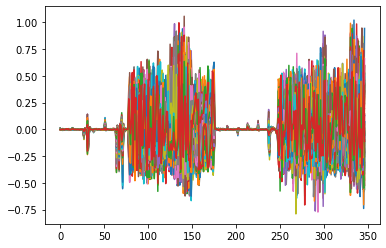

In [274]:
plt.plot(tr1)

In [192]:
trainx[:,:64,0]

array([[ 1.808515e-04,  1.013856e-02,  9.275574e-03, ..., -7.555679e-04,
        -1.528170e-03, -2.391153e-03],
       [ 1.093752e-03,  4.550077e-03,  2.879173e-03, ..., -1.147484e-03,
        -2.222655e-04,  1.575500e-03],
       [ 3.531266e-03,  2.285063e-03, -4.197538e-04, ..., -4.646144e-03,
        -2.941333e-03, -1.598751e-03],
       ...,
       [-2.267175e-01, -1.778169e-01, -1.508691e-01, ..., -2.953570e-01,
        -2.038313e-01, -1.245484e-01],
       [-6.480597e-02, -7.993300e-02, -6.834966e-02, ..., -2.949353e-01,
        -2.434030e-01, -2.152148e-01],
       [-1.944707e-01, -1.738025e-01, -1.275446e-01, ..., -3.150159e-01,
        -3.307374e-01, -2.723475e-01]])

In [201]:
i = trainx.flatten()
indexer = np.arange(64)[None, :] + 2*np.arange(7352)[:, None]
i[indexer]


array([[ 1.808515e-04,  1.076681e-02,  5.556068e-02, ...,  4.986670e-02,
         4.324535e-03,  6.213647e-03],
       [ 5.556068e-02,  1.012817e+00, -1.232167e-01, ...,  6.213647e-03,
         2.537128e-03,  3.537854e-02],
       [-1.232167e-01,  1.029341e-01,  3.019122e-02, ...,  3.537854e-02,
         1.019263e+00, -1.278912e-01],
       ...,
       [ 1.448870e-03, -8.410396e-03,  1.022630e+00, ..., -8.002140e-03,
         1.630754e-03,  3.208066e-03],
       [ 1.022630e+00, -1.354139e-01,  6.682038e-02, ...,  3.208066e-03,
        -3.957078e-03,  1.022642e+00],
       [ 6.682038e-02,  5.434645e-03,  1.626276e-03, ...,  1.022642e+00,
        -1.339426e-01,  7.099247e-02]])

plt.figure(figsize = (16,8),dpi=150)
tr1.plot(label='tr1')

In [233]:
q=pd.read_csv('y_train.txt',header=None,delim_whitespace=True)
#coly=q['subject']
#coly
q.rename(columns={'subject'},inplace = True)

TypeError: 'set' object is not callable

In [228]:
f=pd.read_csv('body_acc_x_train.txt',header=None,delim_whitespace=True)
fnew = f.iloc[:,0:64]
#plt.plot(fnew)
mew = pd.concat([fnew,coly],axis=1)
mew

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,0
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.004979,0.003447,0.004378,0.005006,0.001997,-0.000472,-0.000756,-0.001528,-0.002391,5
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,5
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,5
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,5
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.229612,-0.202276,-0.199332,-0.142675,-0.125396,-0.083267,-0.061474,-0.001786,0.324738,2
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068,2
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548,2
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215,2


In [257]:
c=pd.read_csv('y_train.txt',header=None,delim_whitespace=True)
cnew=c[:347]
coly=cnew[0]
meow=pd.concat([tr1,coly],axis=1)


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [268]:
jk =pd.DataFrame(tr1.flatten(),columns = ['col1']) 
=

,0
0,0.307068
1,0.194517
2,0.193805
3,0.233291
4,0.238493
5,0.271543
6,0.261670
